In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier

# Datos de entrenamiento
X_train = np.array([[150, 1],   # Manzana (peso, color: 1=Rojo)
                    [160, 1],   # Manzana
                    [180, 0],   # Plátano (color: 0=Amarillo)
                    [170, 0],   # Plátano
                    [25, 2],    # Uva (color: 2=Verde)
                    [30, 2]])   # Uva
y_train = np.array(['Manzana', 'Manzana', 'Plátano', 'Plátano', 'Uva', 'Uva'])
# Nueva fruta a clasificar
nueva_fruta = np.array([[175, 0]])

# Crear el clasificador KNN (con k=3 vecinos)
knn = KNeighborsClassifier(n_neighbors=3)

# Entrenar el clasificador con los datos de entrenamiento
knn.fit(X_train, y_train)

# Predecir la clase de la nueva fruta
prediccion = knn.predict(nueva_fruta)
print(f"La nueva fruta (peso=175g, color=Amarillo) se predice como: {prediccion[0]}")

La nueva fruta (peso=175g, color=Amarillo) se predice como: Plátano


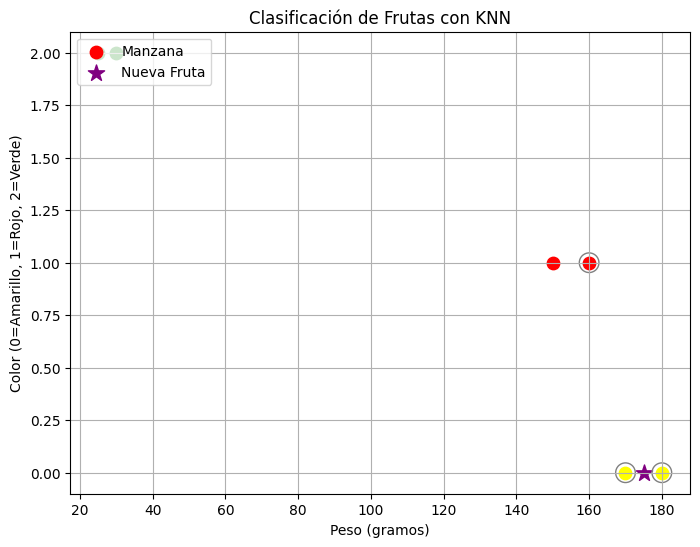

In [2]:
# Graficacion

plt.figure(figsize=(8, 6))
# Graficar las frutas de entrenamiento y resaltar los vecinos más cercanos
colores = {'Manzana': 'red', 'Plátano': 'yellow', 'Uva': 'green'}
for i in range(len(X_train)):
    plt.scatter(X_train[i, 0], X_train[i, 1], color=colores[y_train[i]], label=y_train[i] if i < 1 else "", s=80)

plt.scatter(nueva_fruta[0, 0], nueva_fruta[0, 1], color='purple', marker='*', s=150, label='Nueva Fruta')

distances, indices = knn.kneighbors(nueva_fruta)
for idx in indices[0]:
    plt.scatter(X_train[idx, 0], X_train[idx, 1], facecolors='none', edgecolors='gray', s=200)

    plt.xlabel('Peso (gramos)')
plt.ylabel('Color (0=Amarillo, 1=Rojo, 2=Verde)')
plt.title('Clasificación de Frutas con KNN')
plt.legend(loc='upper left')
plt.grid(True)
plt.show()
